# Introduction to the xgbsurv package - Efron

This notebook introduces `xgbsurv` using a specific dataset. It structured by the following steps:

- Load data
- Load model
- Fit model
- Predict and evaluate model

The syntax conveniently follows that of sklearn.

In [1]:
from xgbsurv.datasets import load_metabric
from xgbsurv import XGBSurv
from xgbsurv.models.utils import sort_X_y, transform_back
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
current_path = os.getcwd() 
one_level_up = os.path.abspath(os.path.join(current_path,  ".."))

## Load Data

In [2]:
data = load_metabric(path=one_level_up+"/xgbsurv/datasets/data/", as_frame=False)
# stratify by event indicated by sign
target_sign = np.sign(data.target)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=target_sign)
# sort data
X_train, y_train = sort_X_y(X_train, y_train)
X_test, y_test = sort_X_y(X_test, y_test)

Values are being sorted!
Values are being sorted!


## Load Model

In [3]:
model = XGBSurv(n_estimators=100, objective="efron_objective",
                                             eval_metric="efron_loss",
                                             learning_rate=0.3,
                                             random_state=42, 
                                             disable_default_eval_metric=1,
                                             )
model

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function efron_likelihood at 0x136f09b20>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function efron_objective at 0x136f0a2a0>), ...)

The options of loss and objective functions can be obtained like below:

In [4]:
print(model.get_loss_functions().keys())
print(model.get_objective_functions().keys())

dict_keys(['breslow_loss', 'efron_loss', 'cind_loss', 'deephit_loss', 'aft_loss', 'ah_loss', 'eh_loss'])
dict_keys(['breslow_objective', 'efron_objective', 'cind_objective', 'deephit_objective', 'aft_objective', 'ah_objective', 'eh_objective'])


## Fit Model

In [5]:
eval_set = [(X_train, y_train)]

In [6]:
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-efron_likelihood:6.36616
[1]	validation_0-efron_likelihood:6.26730
[2]	validation_0-efron_likelihood:6.20719
[3]	validation_0-efron_likelihood:6.14300
[4]	validation_0-efron_likelihood:6.09564
[5]	validation_0-efron_likelihood:6.05859
[6]	validation_0-efron_likelihood:6.03398
[7]	validation_0-efron_likelihood:6.00126
[8]	validation_0-efron_likelihood:5.94426
[9]	validation_0-efron_likelihood:5.90954
[10]	validation_0-efron_likelihood:5.88586
[11]	validation_0-efron_likelihood:5.86904
[12]	validation_0-efron_likelihood:5.84211
[13]	validation_0-efron_likelihood:5.81658
[14]	validation_0-efron_likelihood:5.78275
[15]	validation_0-efron_likelihood:5.75842
[16]	validation_0-efron_likelihood:5.73602
[17]	validation_0-efron_likelihood:5.71288
[18]	validation_0-efron_likelihood:5.70094
[19]	validation_0-efron_likelihood:5.67872
[20]	validation_0-efron_likelihood:5.66081
[21]	validation_0-efron_likelihood:5.65000
[22]	validation_0-efron_likelihood:5.63141
[23]	validation_0-efr

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function efron_likelihood at 0x136f09b20>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function efron_objective at 0x136f0a2a0>), ...)

The model can be saved like below. Note that objective and eval_metric are not saved.

In [7]:
#model.save_model("introduction_model_breslow.json")

## Predict

In [8]:
preds_train = model.predict(X_train, output_margin=True)
preds_test = model.predict(X_test, output_margin=True)

### Predict Cumulative Hazard

In [9]:
df_cum_hazards = model.predict_cumulative_hazard_function(X_train, X_test, y_train, y_test)
df_cum_hazards.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
300.866669,74.463939,116.970158,27.543844,5.318452,41.690502,32.806206,2.384339,1.697297,56.511457,87.684205,...,29.452427,19.615538,2581.685851,35.200142,11.188109,6.993424,4.770373,100.350647,2.961003,24.726515
307.633331,74.463939,116.970158,27.543844,5.318452,41.690502,32.806206,2.384339,1.697297,56.511457,87.684205,...,29.452427,19.615538,2581.685851,35.200142,11.188109,6.993424,4.770373,100.350647,2.961003,24.726515
318.200012,74.463939,116.970158,27.543844,5.318452,41.690502,32.806206,2.384339,1.697297,56.511457,87.684205,...,29.452427,19.615538,2581.685851,35.200142,11.188109,6.993424,4.770373,100.350647,2.961003,24.726515


## Predict Survival Function

In [10]:
df_survival_function = model.predict_survival_function(X_train, X_test, y_train, y_test)
df_survival_function.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
300.866669,4.578491e-33,1.586741e-51,1.091090e-12,0.0049,7.835112e-19,5.655170e-15,0.09215,0.183178,2.866726e-25,8.302973e-39,...,1.617982e-13,3.027471e-09,0.0,5.161462e-16,0.000014,0.000918,0.008477,2.619797e-44,0.051767,1.825622e-11
307.633331,4.578491e-33,1.586741e-51,1.091090e-12,0.0049,7.835112e-19,5.655170e-15,0.09215,0.183178,2.866726e-25,8.302973e-39,...,1.617982e-13,3.027471e-09,0.0,5.161462e-16,0.000014,0.000918,0.008477,2.619797e-44,0.051767,1.825622e-11
318.200012,4.578491e-33,1.586741e-51,1.091090e-12,0.0049,7.835112e-19,5.655170e-15,0.09215,0.183178,2.866726e-25,8.302973e-39,...,1.617982e-13,3.027471e-09,0.0,5.161462e-16,0.000014,0.000918,0.008477,2.619797e-44,0.051767,1.825622e-11


### Visualize Predictions

Text(0.5, 1.0, 'Cumulative Hazard Efron')

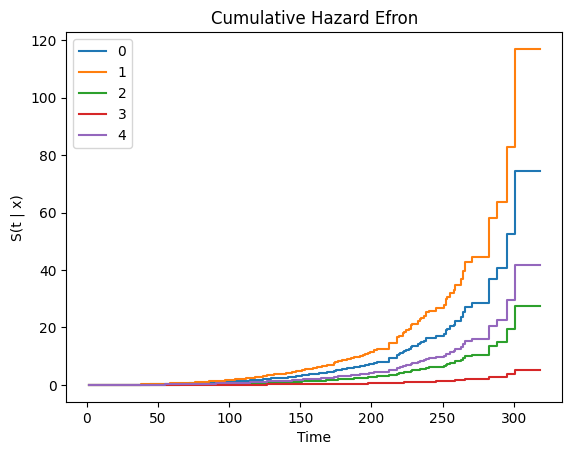

In [11]:
df_cum_hazards.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Cumulative Hazard Efron")

Text(0.5, 1.0, 'Survival Curve Efron')

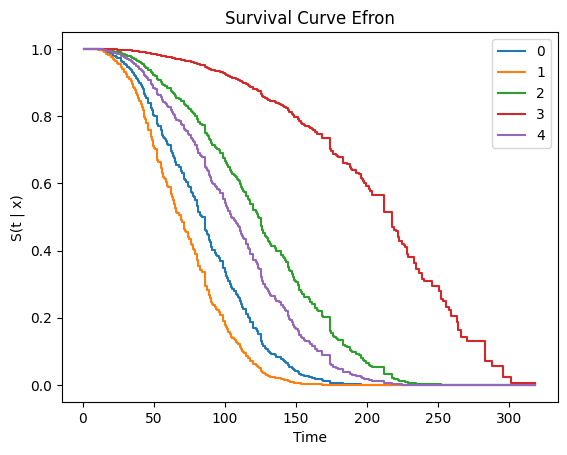

In [12]:
df_survival_function.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Survival Curve Efron")

## Evaluate

### Test

In [13]:
durations_test, events_test = transform_back(y_test)
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev = EvalSurv(df_survival_function, durations_test, events_test, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))

Concordance Index 0.6113839677249605


In [14]:
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

Integrated Brier Score: 0.21414924734027174
